In [53]:
# Import necessary modules
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Read file using gpd.read_file()
map = gpd.read_file("./Datasets/Map/Buurten.shp")
benches = gpd.read_file("./Datasets/Zitbanken/Zitbanken.shp")
crime = gpd.read_file("./Datasets/crimes_data.csv")

print(gpd.read_file("./Datasets/Map/Buurten.shp").crs)
print(gpd.read_file("./Datasets/Zitbanken/Zitbanken.shp").crs)

epsg:4326
epsg:4326


In [55]:
neighborhoods = map['BUURT'].unique()
dissect = crime
for neighborhood in neighborhoods:
    dissect = dissect[dissect['Neighborhood'] != neighborhood]
    
neighborhoods_to_remove = dissect['Neighborhood'].tolist()
neighborhoods_to_remove = list(set(neighborhoods_to_remove))
neighborhoods_to_remove.remove('Chasse')

# Remove rows with specific neighborhoods
crime = crime[~crime['Neighborhood'].isin(neighborhoods_to_remove)]

In [56]:
crime = crime.drop('geometry', axis=1)
drops = ['BUURTCODE', 'OPPERVLAKT', 'GEMEENTE', 'WOONPLAATS', 'WIJKCODE', 'GEMEENTECO', 'WOONPLAA_1', 'Shape__Len', 'Shape__Are']
map = map.drop(drops, axis=1)

In [57]:
map = map.rename(columns={'BUURT': 'Neighborhood'})

In [58]:
map['Neighborhood'].replace(map['Neighborhood'].unique()[4], 'Chasse', inplace=True)
crime['Neighborhood'].replace(crime['Neighborhood'].unique()[1], 'Chasse', inplace=True)

In [59]:
merged_df = map.merge(crime, on='Neighborhood')
merged_df.head()

,OBJECTID,Neighborhood,WIJK,geometry,Crime type,Period,Registered Crimes
0,117,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,2012/01,22
1,117,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,2012/02,14
2,117,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,2012/03,16
3,117,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,2012/04,13
4,117,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,2012/05,15


In [60]:
crime['Neighborhood'].unique()[1]

'Chasse'

In [61]:
benches_area = gpd.sjoin(benches, map, how='left', predicate='within')
neighborhood_bench_count = benches_area.groupby('Neighborhood')['OBJECTID_left'].count().reset_index()
neighborhood_bench_count.head()

,Neighborhood,OBJECTID_left
0,Bavel,66
1,Belcrum,23
2,Biesdonk,57
3,Blauwe Kei,52
4,Boeimeer,126


In [62]:
map['Neighborhood']

0                  Kievitsloop
1                  Princenhage
2                  Heusdenhout
3           Buitengebied Bavel
4                       Chasse
5                      Mastbos
6                    Overakker
7                   Valkenberg
8                    Sportpark
9                  Schorsmolen
10                     Station
11                 Vuchtpolder
12                  Effen-Rith
13                   Hazeldonk
14                   Hagebeemd
15                     Heilaar
16                   Haagpoort
17             Nieuw Wolfslaar
18                    Hoogeind
19                    Tuinzigt
20                  Blauwe Kei
21                     Krogten
22                    Ginneken
23                     Liesbos
24                      Heuvel
25                 Prinsenbeek
26                    Zandberg
27                     Ypelaar
28                        Emer
29                  Steenakker
30                 Waterdonken
31                    Kesteren
32      

In [63]:
crime['Neighborhood'].unique()

array(['Valkenberg', 'Chasse', 'Fellenoord', 'Schorsmolen', 'Station',
       'City', 'Belcrum', 'Doornbos-Linie', 'Biesdonk', 'Geeren-zuid',
       'Wisselaar', 'Krogten', 'Geeren-noord', 'Waterdonken',
       'Brabantpark', 'Sportpark', 'Zandberg', 'Heusdenhout',
       'Moleneind-oost', 'Hoogeind', 'Blauwe Kei', 'Ypelaar', 'Overakker',
       'Ginneken', 'Mastbos', 'Boeimeer', 'Ruitersbos', 'Haagpoort',
       'Heuvel', 'Tuinzigt', 'Princenhage', 'Westerpark', 'Heilaar',
       'Hazeldonk', 'Steenakker', 'Effen-Rith', 'Liesbos', 'Gageldonk',
       'Kievitsloop', 'Kesteren', 'Muizenberg', 'Heksenwiel',
       'Overkroeten', 'Kroeten', 'Emer', 'Hagebeemd', 'Bavel',
       'Nieuw Wolfslaar', 'Buitengebied Bavel', 'Ulvenhout',
       'Buitengebied Ulvenhout', 'Prinsenbeek',
       'Buitengebied Prinsenbeek', 'Teteringen', 'Vuchtpolder',
       'Buitengebied Teteringen'], dtype=object)

In [64]:
merged_df['Neighborhood'].unique()

array(['Kievitsloop', 'Princenhage', 'Heusdenhout', 'Buitengebied Bavel',
       'Chasse', 'Mastbos', 'Overakker', 'Valkenberg', 'Sportpark',
       'Schorsmolen', 'Station', 'Vuchtpolder', 'Effen-Rith', 'Hazeldonk',
       'Hagebeemd', 'Heilaar', 'Haagpoort', 'Nieuw Wolfslaar', 'Hoogeind',
       'Tuinzigt', 'Blauwe Kei', 'Krogten', 'Ginneken', 'Liesbos',
       'Heuvel', 'Prinsenbeek', 'Zandberg', 'Ypelaar', 'Emer',
       'Steenakker', 'Waterdonken', 'Kesteren', 'Wisselaar', 'Bavel',
       'Geeren-noord', 'Overkroeten', 'Muizenberg', 'Ruitersbos',
       'Ulvenhout', 'Westerpark', 'Brabantpark', 'Moleneind-oost',
       'Kroeten', 'Buitengebied Ulvenhout', 'City', 'Heksenwiel',
       'Doornbos-Linie', 'Fellenoord', 'Buitengebied Prinsenbeek',
       'Teteringen', 'Biesdonk', 'Belcrum', 'Buitengebied Teteringen',
       'Boeimeer', 'Geeren-zuid', 'Gageldonk'], dtype=object)

In [71]:
non_numeric_rows = merged_df[merged_df['Registered Crimes'].isna()]
print(non_numeric_rows['Registered Crimes'])

1215     NaN
1216     NaN
1217     NaN
1218     NaN
1219     NaN
          ..
445495   NaN
445496   NaN
445497   NaN
445498   NaN
445499   NaN
Name: Registered Crimes, Length: 30240, dtype: float64


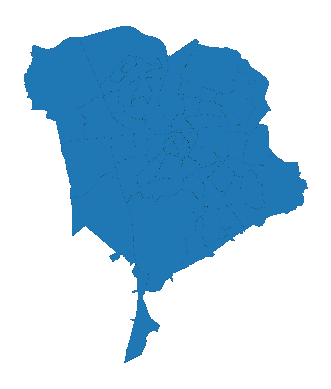

In [67]:
ax = merged_df.plot(column = "Registered Crimes")
ax.set_axis_off()

In [ ]:
ax = map.plot(column = "Shape__Are", legend=True, legend_kwds={"label": "Crimes", "orientation": "horizontal"})
ax.set_axis_off()

In [ ]:
ax = map.plot()
benches.plot(ax=ax, marker='^', color='red', markersize=1)
ax.set_axis_off()

In [ ]:
base = map.plot(color='white', edgecolor='black')